# Домашнє завдання. Інтегральне обчислення. Чисельне інтегрування

**Опис домашнього завдання**

Ти замовив/-ла виконання дослідження ефективності роботи співробітників і отримав/-ла наближену залежність ефективності роботи (кількість тасків за одиницю часу) від часу доби, за умови, що завдання однакові за складністю.
\
$$
2\left(\frac{4}{1.2\sqrt{2\pi }}e^{- \frac{1}{2}\left(\frac{x - 11}{1.2}\right)^2} + \frac{7}{2.4\sqrt{2\pi }}e^{- \frac{1}{2}\left(\frac{x - 15}{2.4}\right)^2}\right)
$$
\
$\boldsymbol П\boldsymbol р\boldsymbol и\boldsymbol м\boldsymbol і\boldsymbol т\boldsymbol к\boldsymbol а*\ldotp$  Форма функції наближено відповідає реальним спостереженням, але функція була спрощена для легшого опрацювання.

Позначимо початок і кінець робочого дня як a=9 та b=18 відповідно.

Тобі буде потрібно порахувати середню кількість тасків, виконаних упродовж робочого дня (в робочі години з 9 до 18).

**Завдання 1**. Візуалізуй функцію на відрізку від 0 до 24. За допомогою SymPy порахуй невизначений інтеграл функції та інтеграл від a до b.

Для того щоб порахувати середню кількість тасків, виконаних упродовж робочого дня, спочатку потрібно обчислити інтеграл функції ефективності від 𝑎 = 9 до 𝑏 = 18, а також візуалізувати функцію на відрізку від 0 до 24.


In [8]:
#Обчислення інтегралів

import sympy as sp

# Оголошення змінної x
x = sp.Symbol('x')

# Визначення функції ефективності
efficiency_func = 2 * ((4 / (1.2 * sp.sqrt(2 * sp.pi))) * sp.exp(-0.5 * ((x - 11) / 1.2) ** 2) +
                       (7 / (2.4 * sp.sqrt(2 * sp.pi))) * sp.exp(-0.5 * ((x - 15) / 2.4) ** 2))

# Обчислення невизначеного інтегралу
indefinite_integral = sp.integrate(efficiency_func, x)
indefinite_integral

# Обчислення визначеного інтегралу від 9 до 18
a, b = 9, 18
definite_integral = sp.integrate(efficiency_func, (x, a, b))
definite_integral.evalf()



20.0516450141883

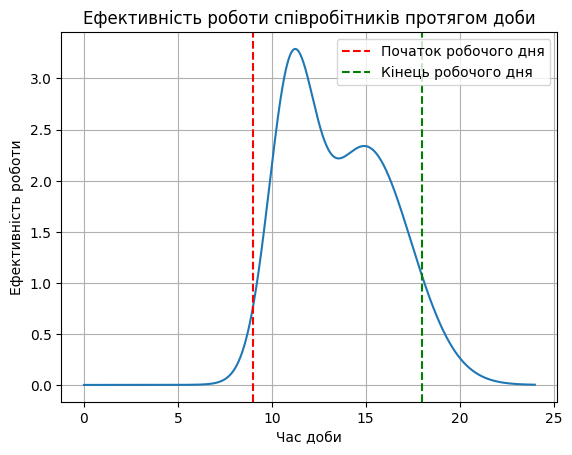

In [9]:
#Візуалізація функції

import numpy as np
import matplotlib.pyplot as plt

# Визначення функції ефективності
def efficiency(x):
    term1 = (4 / (1.2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 11) / 1.2) ** 2)
    term2 = (7 / (2.4 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 15) / 2.4) ** 2)
    return 2 * (term1 + term2)

# Генерація значень для x від 0 до 24
x = np.linspace(0, 24, 1000)
y = efficiency(x)

# Побудова графіку
plt.plot(x, y)
plt.xlabel('Час доби')
plt.ylabel('Ефективність роботи')
plt.title('Ефективність роботи співробітників протягом доби')
plt.grid(True)
plt.axvline(x=9, color='r', linestyle='--', label='Початок робочого дня')
plt.axvline(x=18, color='g', linestyle='--', label='Кінець робочого дня')
plt.legend()
plt.show()


На графіку вище зображена ефективність роботи співробітників протягом доби. Червона вертикальна лінія позначає початок робочого дня (9:00), а зелена — кінець робочого дня (18:00).

$\int f\left(x\right)dx$

визначений інтеграл функції ефективності від 9:00 до 18:00 дорівнює:

$\int_9^{18}f\left(x\right)dx = 20.0516$

Це означає, що середня кількість тасків, виконаних упродовж робочого дня (з 9:00 до 18:00), становить приблизно 20.05 тасків.

**Завдання 2**. Напиши функцію чисельного інтегрування методом прямокутників та порахуй інтеграл від a до b.

Для чисельного інтегрування методом прямокутників можна використовувати такий підхід: розбиваємо інтервал інтегрування на маленькі відрізки, обчислюємо значення функції в середині кожного відрізка, а потім сумуємо площі всіх прямокутників, висота кожного з яких дорівнює значенню функції в середині відрізка, а ширина — довжині відрізка.

In [10]:
# Визначення функції ефективності
def efficiency(x):
    term1 = (4 / (1.2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 11) / 1.2) ** 2)
    term2 = (7 / (2.4 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 15) / 2.4) ** 2)
    return 2 * (term1 + term2)

# Функція чисельного інтегрування методом прямокутників
def rectangle_method(f, a, b, n):
    dx = (b - a) / n  # ширина кожного відрізка
    total_area = 0
    for i in range(n):
        x_i = a + (i + 0.5) * dx  # середина кожного відрізка
        total_area += f(x_i) * dx
    return total_area

# Параметри інтегрування
a = 9
b = 18
n = 1000  # кількість відрізків

# Обчислення інтегралу
integral_value = rectangle_method(efficiency, a, b, n)
integral_value


20.05165035518613

**Завдання 3**. Напиши функцію чисельного інтегрування методом трапецій та порахуй інтеграл від a до b.

Для цього виконаємо такі кроки:

*   Розділимо відрізок від 𝑎 до 𝑏 на 𝑛 рівних частин.
*   Обчислимо значення функції 𝑓(𝑥) в кожній точці цього розбиття.
*   Використаємо формулу методу трапецій для кожної пари сусідніх точок.
*   Додамо всі ці значення разом, щоб отримати наближене значення інтегралу.


In [11]:
def trapezoidal_rule_integration(f, a, b, n):
    """
    Чисельне інтегрування методом трапецій.

    :param f: Функція, яку потрібно інтегрувати.
    :param a: Нижня межа інтегрування.
    :param b: Верхня межа інтегрування.
    :param n: Кількість підінтервалів.
    :return: Наближене значення інтегралу.
    """
    dx = (b - a) / n  # Ширина кожного підінтервалу
    integral = 0.5 * (f(a) + f(b))  # Початкове наближене значення інтегралу
    for i in range(1, n):
        xi = a + i * dx  # Точка на поточному підінтервалі
        integral += f(xi)  # Додаємо значення функції в цій точці
    integral *= dx  # Множимо на ширину підінтервалу
    return integral

# Визначимо функцію f для подальшого використання
f = lambda x: 2 * (4 / (1.2 * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - 11) / 1.2)**2) +
                   7 / (2.4 * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - 15) / 2.4)**2))

# Використаємо метод трапецій для обчислення інтегралу від a до b
a, b = 9, 18
n = 1000  # Кількість підінтервалів (можна змінювати для отримання більш точного результату)

approx_integral_trap = trapezoidal_rule_integration(f, a, b, n)
print(f"Наближене значення інтегралу від {a} до {b}: {approx_integral_trap}")




Наближене значення інтегралу від 9 до 18: 20.051634332194123


**Завдання 4**. Напиши функцію чисельного інтегрування методом Сімпсона та порахуй інтеграл від a до b.

Метод Сімпсона є чисельним методом інтегрування, який використовує квадратичні апроксимації для обчислення інтегралів. Він є точнішим за метод трапецій і може бути використаний для обчислення наближеного значення інтегралу на заданому відрізку.

In [12]:
def simpsons_rule_integration(f, a, b, n):
    """
    Чисельне інтегрування методом Сімпсона.

    :param f: Функція, яку потрібно інтегрувати.
    :param a: Нижня межа інтегрування.
    :param b: Верхня межа інтегрування.
    :param n: Кількість підінтервалів (повинна бути парним числом).
    :return: Наближене значення інтегралу.
    """
    if n % 2 != 0:
        raise ValueError("Кількість підінтервалів повинна бути парним числом")

    dx = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)

    integral = dx / 3 * np.sum(y[0:-1:2] + 4 * y[1::2] + y[2::2])

    return integral

# Визначимо функцію f для подальшого використання
f = lambda x: 2 * (4 / (1.2 * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - 11) / 1.2)**2) +
                   7 / (2.4 * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - 15) / 2.4)**2))

# Використаємо метод Сімпсона для обчислення інтегралу від a до b
a, b = 9, 18
n = 1000  # Кількість підінтервалів (повинна бути парним числом)

approx_integral_simpson = simpsons_rule_integration(f, a, b, n)
print(f"Наближене значення інтегралу від {a} до {b}: {approx_integral_simpson}")


Наближене значення інтегралу від 9 до 18: 20.051645014196325


**Завдання 5**. Порахуй інтеграл від a до b за допомогою функції scipy.integrate.quad.



In [13]:
from scipy.integrate import quad
import numpy as np

# Визначимо функцію f для подальшого використання
f = lambda x: 2 * ((4 / (1.2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 11) / 1.2)**2) +
                   (7 / (2.4 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 15) / 2.4)**2))

# Визначимо межі інтегрування
a, b = 9, 18

# Обчислимо інтеграл за допомогою функції quad
integral_value, error = quad(f, a, b)
print("Значення інтегралу від", a, "до", b, "за допомогою quad:", integral_value)


Значення інтегралу від 9 до 18 за допомогою quad: 20.051645014188296


In [2]:
pip install scipy

In [4]:
pip install numpy

In [5]:
pip install matplotlib